<a href="https://colab.research.google.com/github/ucfilho/Higor/blob/main/ANN/Higor_MN_ann_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
!gdown 1oOmdfbuG6uI5H5A_72OBfvTCumONGhYo
df = pd.read_excel('Analises_absorção_V1.xlsx','Planilha4')
df = df[['TMB','EDTA','H2SO4','D2EHPA','MN']]
X = np.array(df.drop(['MN'],axis=1))
y = df['MN'].values.reshape(-1,1).copy()

Downloading...
From: https://drive.google.com/uc?id=1oOmdfbuG6uI5H5A_72OBfvTCumONGhYo
To: /content/Analises_absorção_V1.xlsx
100% 30.7k/30.7k [00:00<00:00, 58.5MB/s]


In [3]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30.00,2.00,0.40,0.08,7.700000
1,30.00,2.00,0.40,0.16,10.280833
2,30.00,2.00,0.80,0.08,10.245833
3,30.00,2.00,0.80,0.16,29.762500
4,30.00,4.00,0.40,0.08,11.625000
5,30.00,4.00,0.40,0.16,9.819167
6,30.00,4.00,0.80,0.08,12.056667
7,30.00,4.00,0.80,0.16,10.269167
8,50.00,2.00,0.40,0.08,8.374167
9,50.00,2.00,0.40,0.16,10.686667


In [4]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30.00,2.00,0.40,0.08,7.700000
1,30.00,2.00,0.40,0.16,10.280833
2,30.00,2.00,0.80,0.08,10.245833
3,30.00,2.00,0.80,0.16,29.762500
4,30.00,4.00,0.40,0.08,11.625000
5,30.00,4.00,0.40,0.16,9.819167
6,30.00,4.00,0.80,0.08,12.056667
7,30.00,4.00,0.80,0.16,10.269167
8,50.00,2.00,0.40,0.08,8.374167
9,50.00,2.00,0.40,0.16,10.686667


In [5]:

scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)
# X_train = scaler_X.transform(X)
scaler = StandardScaler()
scaler2 = StandardScaler()
# transform data
scaler_X = scaler.fit(X)
scaler_Y = scaler2.fit(y)
X_train = scaler_X.transform(X)
#X_train = scaler_X.transform(X_train)
##X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y)
#y_test = scaler_Y.transform(y_test)
X_test = X_train[27:,:]
y_test = y_train[27:,:]
X_train = X_train[0:27,:]
y_train = y_train[0:27,:]

''''''

''

In [6]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30.00,2.00,0.40,0.08,7.700000
1,30.00,2.00,0.40,0.16,10.280833
2,30.00,2.00,0.80,0.08,10.245833
3,30.00,2.00,0.80,0.16,29.762500
4,30.00,4.00,0.40,0.08,11.625000
5,30.00,4.00,0.40,0.16,9.819167
6,30.00,4.00,0.80,0.08,12.056667
7,30.00,4.00,0.80,0.16,10.269167
8,50.00,2.00,0.40,0.08,8.374167
9,50.00,2.00,0.40,0.16,10.686667


In [7]:
for i in [3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  N_Hidden=i
  model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                      hidden_layer_sizes=(N_Hidden), max_iter=1500,
                      random_state=11 )
  model.fit(X_train, y_train)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
  y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
  y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
  y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
  mse_train=mean_squared_error(y_obs_train,y_calc_train)
  R2_train=r2_score(y_obs_train,y_calc_train)
  mse_test=mean_squared_error(y_obs_test,y_calc_test)
  R2_test=r2_score(y_obs_test,y_calc_test)
  print("neurons=",i,"MSE train=",mse_train, "R^2 train =",R2_train,"MSE test=",mse_test, "R^2 test =",R2_test )

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


neurons= 3 MSE train= 0.9485011233001592 R^2 train = 0.9446995738974306 MSE test= 166.76199053057448 R^2 test = -2.100813990828399
neurons= 4 MSE train= 1.1605732843203718 R^2 train = 0.9323351384942276 MSE test= 1590.4010741564568 R^2 test = -28.572313727382003
neurons= 5 MSE train= 0.07642666125517239 R^2 train = 0.9955440991800805 MSE test= 9.123917994412976 R^2 test = 0.8303475961264705
neurons= 6 MSE train= 0.07875303575367498 R^2 train = 0.9954084646532665 MSE test= 35.43889291932479 R^2 test = 0.3410403975505172
neurons= 8 MSE train= 0.07634881184727105 R^2 train = 0.9955486380312458 MSE test= 10.604871794936551 R^2 test = 0.8028103722673438


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

neurons= 9 MSE train= 0.07634582014587223 R^2 train = 0.9955488124563024 MSE test= 13.366607814184894 R^2 test = 0.7514579648019872
neurons= 10 MSE train= 0.07641077945392993 R^2 train = 0.9955450251361542 MSE test= 27.216976717297626 R^2 test = 0.49392075541594027
neurons= 11 MSE train= 0.07634708506280835 R^2 train = 0.9955487387078968 MSE test= 31.72903703262458 R^2 test = 0.4100223819993537
neurons= 12 MSE train= 0.07635716904748865 R^2 train = 0.9955481507817089 MSE test= 7.333554793762017 R^2 test = 0.8636380554426475
neurons= 13 MSE train= 0.07635974543897527 R^2 train = 0.9955480005704508 MSE test= 7.32786229275041 R^2 test = 0.8637439032244079
neurons= 14 MSE train= 0.07635847030019006 R^2 train = 0.9955480749148206 MSE test= 11.749359068078729 R^2 test = 0.7815294908291143
neurons= 15 MSE train= 0.0763457292577075 R^2 train = 0.9955488177553518 MSE test= 1.8157173260263424 R^2 test = 0.9662380997611097
neurons= 16 MSE train= 0.07634704162809097 R^2 train = 0.9955487412402695 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

In [8]:
N_Hidden=15
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                     hidden_layer_sizes=(N_Hidden), max_iter=1500,
                     random_state=11 )


In [9]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=15,
             max_iter=1500, random_state=11, solver='lbfgs')

In [10]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [11]:
X_train.shape, X_test.shape

((27, 4), (7, 4))

In [12]:

# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
#y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
''''''

# y_calc_train = Originaly(y,y_calc_train)

''

In [13]:
#y_obs_train = y

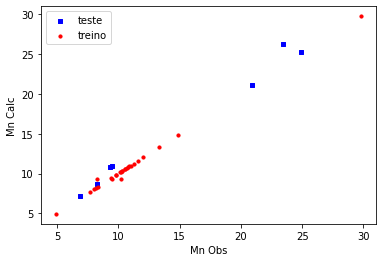

In [14]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
#plt.xlim([15,30])
#plt.ylim([15,30])
plt.ylabel('Mn Calc')
plt.xlabel('Mn Obs')
plt.show()

In [15]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.0763457292577075
R^2 treino= 0.9955488177553518


In [16]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE test=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 test=",R2)

MSE test= 1.8157173260263424
R^2 test= 0.9662380997611097


In [17]:
def function(x):
  global model
  x=x.reshape((1, 4))
  df = pd.DataFrame(x)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun

In [18]:
bounds = [(-1, 1),(-1, 1),(-1, 1),(-1, 1)]
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 4))
print(Condicoes)

     0    1         2         3
0 -2.0 -2.0  1.987258  1.788249


In [19]:
Condicoes = np.array(Condicoes)
X_otimo=scaler_X.inverse_transform(Condicoes)
X_otimo

array([[20.07983665,  0.9533081 ,  0.95677784,  0.19716436]])

In [20]:
Condicoes

array([[-2.        , -2.        ,  1.98725813,  1.78824857]])

In [21]:
yopt=model.predict(np.array(Condicoes))
y_max = scaler_Y.inverse_transform(yopt.reshape(-1,1))
y_max

array([[39.26021476]])